In [1]:
#Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset and storing it into the dataframe df.
df = pd.read_csv('C:/Users/bijoy/OneDrive/Documents/Praxis DS/Own project/Marketing campaign classification/bank.csv')
pd.options.display.max_columns = 30

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df[(df['balance']<0) & (df['default']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
210,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
213,44,management,divorced,tertiary,yes,-411,yes,no,unknown,2,jun,432,4,-1,0,unknown,yes
216,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
222,26,blue-collar,single,secondary,yes,-36,yes,no,unknown,3,jun,482,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,46,management,married,tertiary,yes,-337,no,yes,cellular,21,aug,120,2,-1,0,unknown,no
10834,60,management,married,tertiary,yes,-311,no,no,cellular,25,aug,151,6,-1,0,unknown,no
10968,35,management,married,tertiary,yes,-10,yes,no,cellular,15,may,168,2,364,1,other,no
11021,32,blue-collar,married,secondary,yes,-238,yes,no,unknown,27,may,427,1,-1,0,unknown,no


## EDA

In [6]:
#shows unique values for all columns
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [7]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

### Categorical variable

In [8]:
# Default consider the ability of being in positive or negative on his bank account  
test= df.groupby('default')['balance'].mean()
test

default
no     1552.840640
yes     -61.803571
Name: balance, dtype: float64

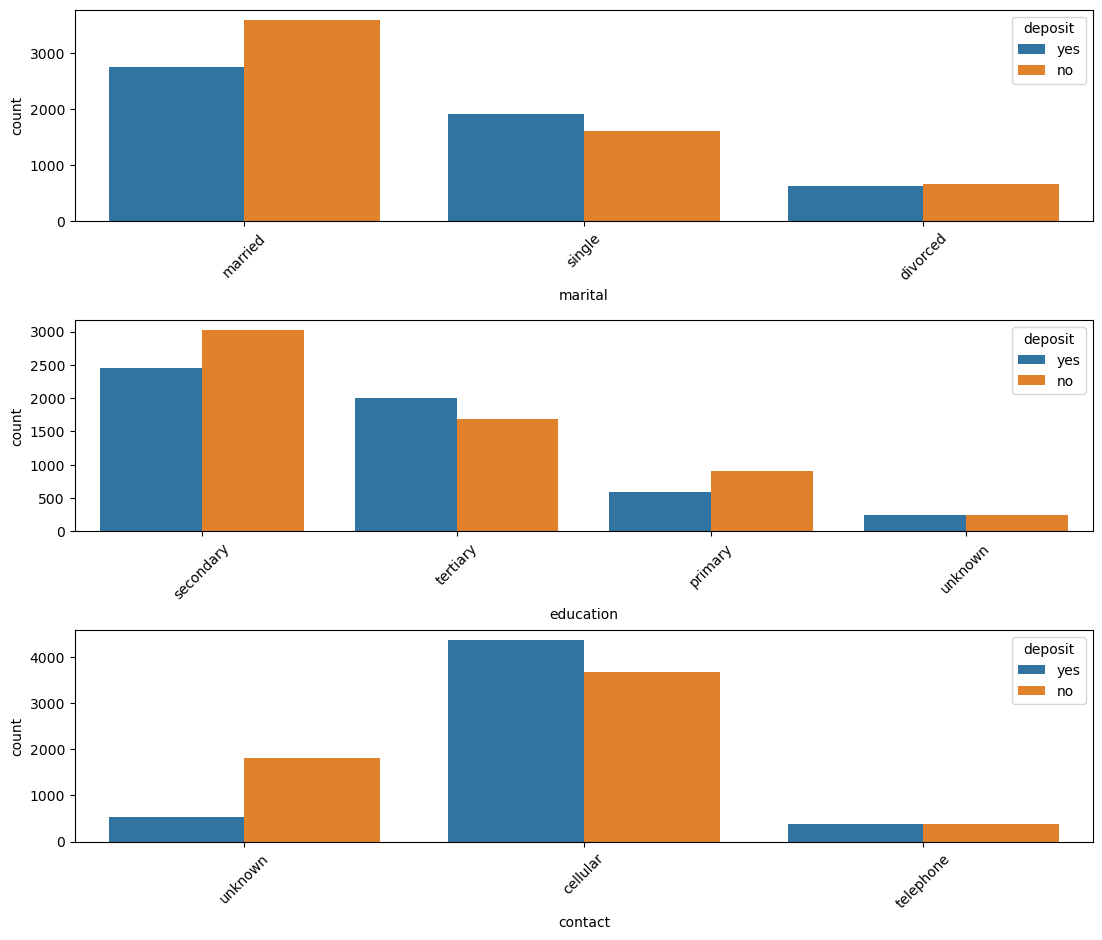

In [9]:
cols =['marital', 'education', 'contact']

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.tight_layout(pad=5.0)

for col, ax in zip(cols, axes.flatten()):
    sns.countplot(x=col,data=df, hue='deposit', ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
df.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [11]:
df.previous.value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

# Feature selection

In [12]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['deposit'], df[column])

    # Perform the Chi-square test
    result = chi2_contingency(contingency_table)

    # Print results
    
    print("Statistical test : ", result[0], "\np_value : ", result[1])

    # Check for significance (e.g., using a significance level of 0.05)
    if result[1] < 0.05:
        print(f"The association between {column} and deposit is statistically significant.")
    else:
        print(f"There is no significant association between {column} and deposit.")
    print("\n")


Statistical test :  378.0752558664989 
p_value :  2.741689587081072e-74
The association between job and deposit is statistically significant.


Statistical test :  109.58335610012479 
p_value :  1.600576988089358e-24
The association between marital and deposit is statistically significant.


Statistical test :  122.77008967211441 
p_value :  1.9534186354212855e-26
The association between education and deposit is statistically significant.


Statistical test :  17.808573693473097 
p_value :  2.442800179192829e-05
The association between default and deposit is statistically significant.


Statistical test :  463.1892407533161 
p_value :  9.724394114495535e-103
The association between housing and deposit is statistically significant.


Statistical test :  135.83217051738103 
p_value :  2.171286879630289e-31
The association between loan and deposit is statistically significant.


Statistical test :  736.6866796046972 
p_value :  1.0728032438445805e-160
The association between contact and d

In [13]:
df1=df.drop('duration',axis=1) #as the duration of call would be unknown before calling.

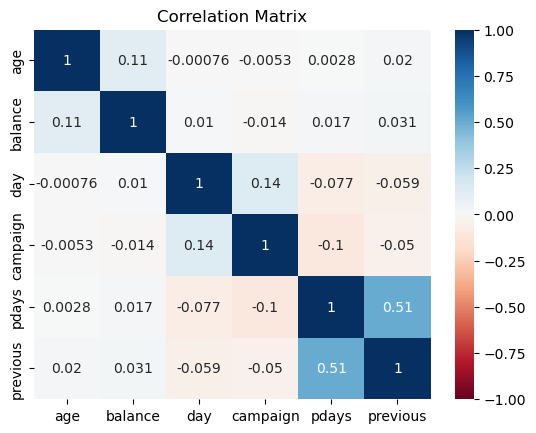

In [14]:
sns.heatmap(df1.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
df2=df1.drop('pdays',axis=1) # as pdays has association with previous

In [16]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes


In [17]:
df2.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

## Outliers detection

In [18]:
df_numerical=df2[['age','balance', 'campaign','previous']]

<AxesSubplot:xlabel='deposit', ylabel='previous'>

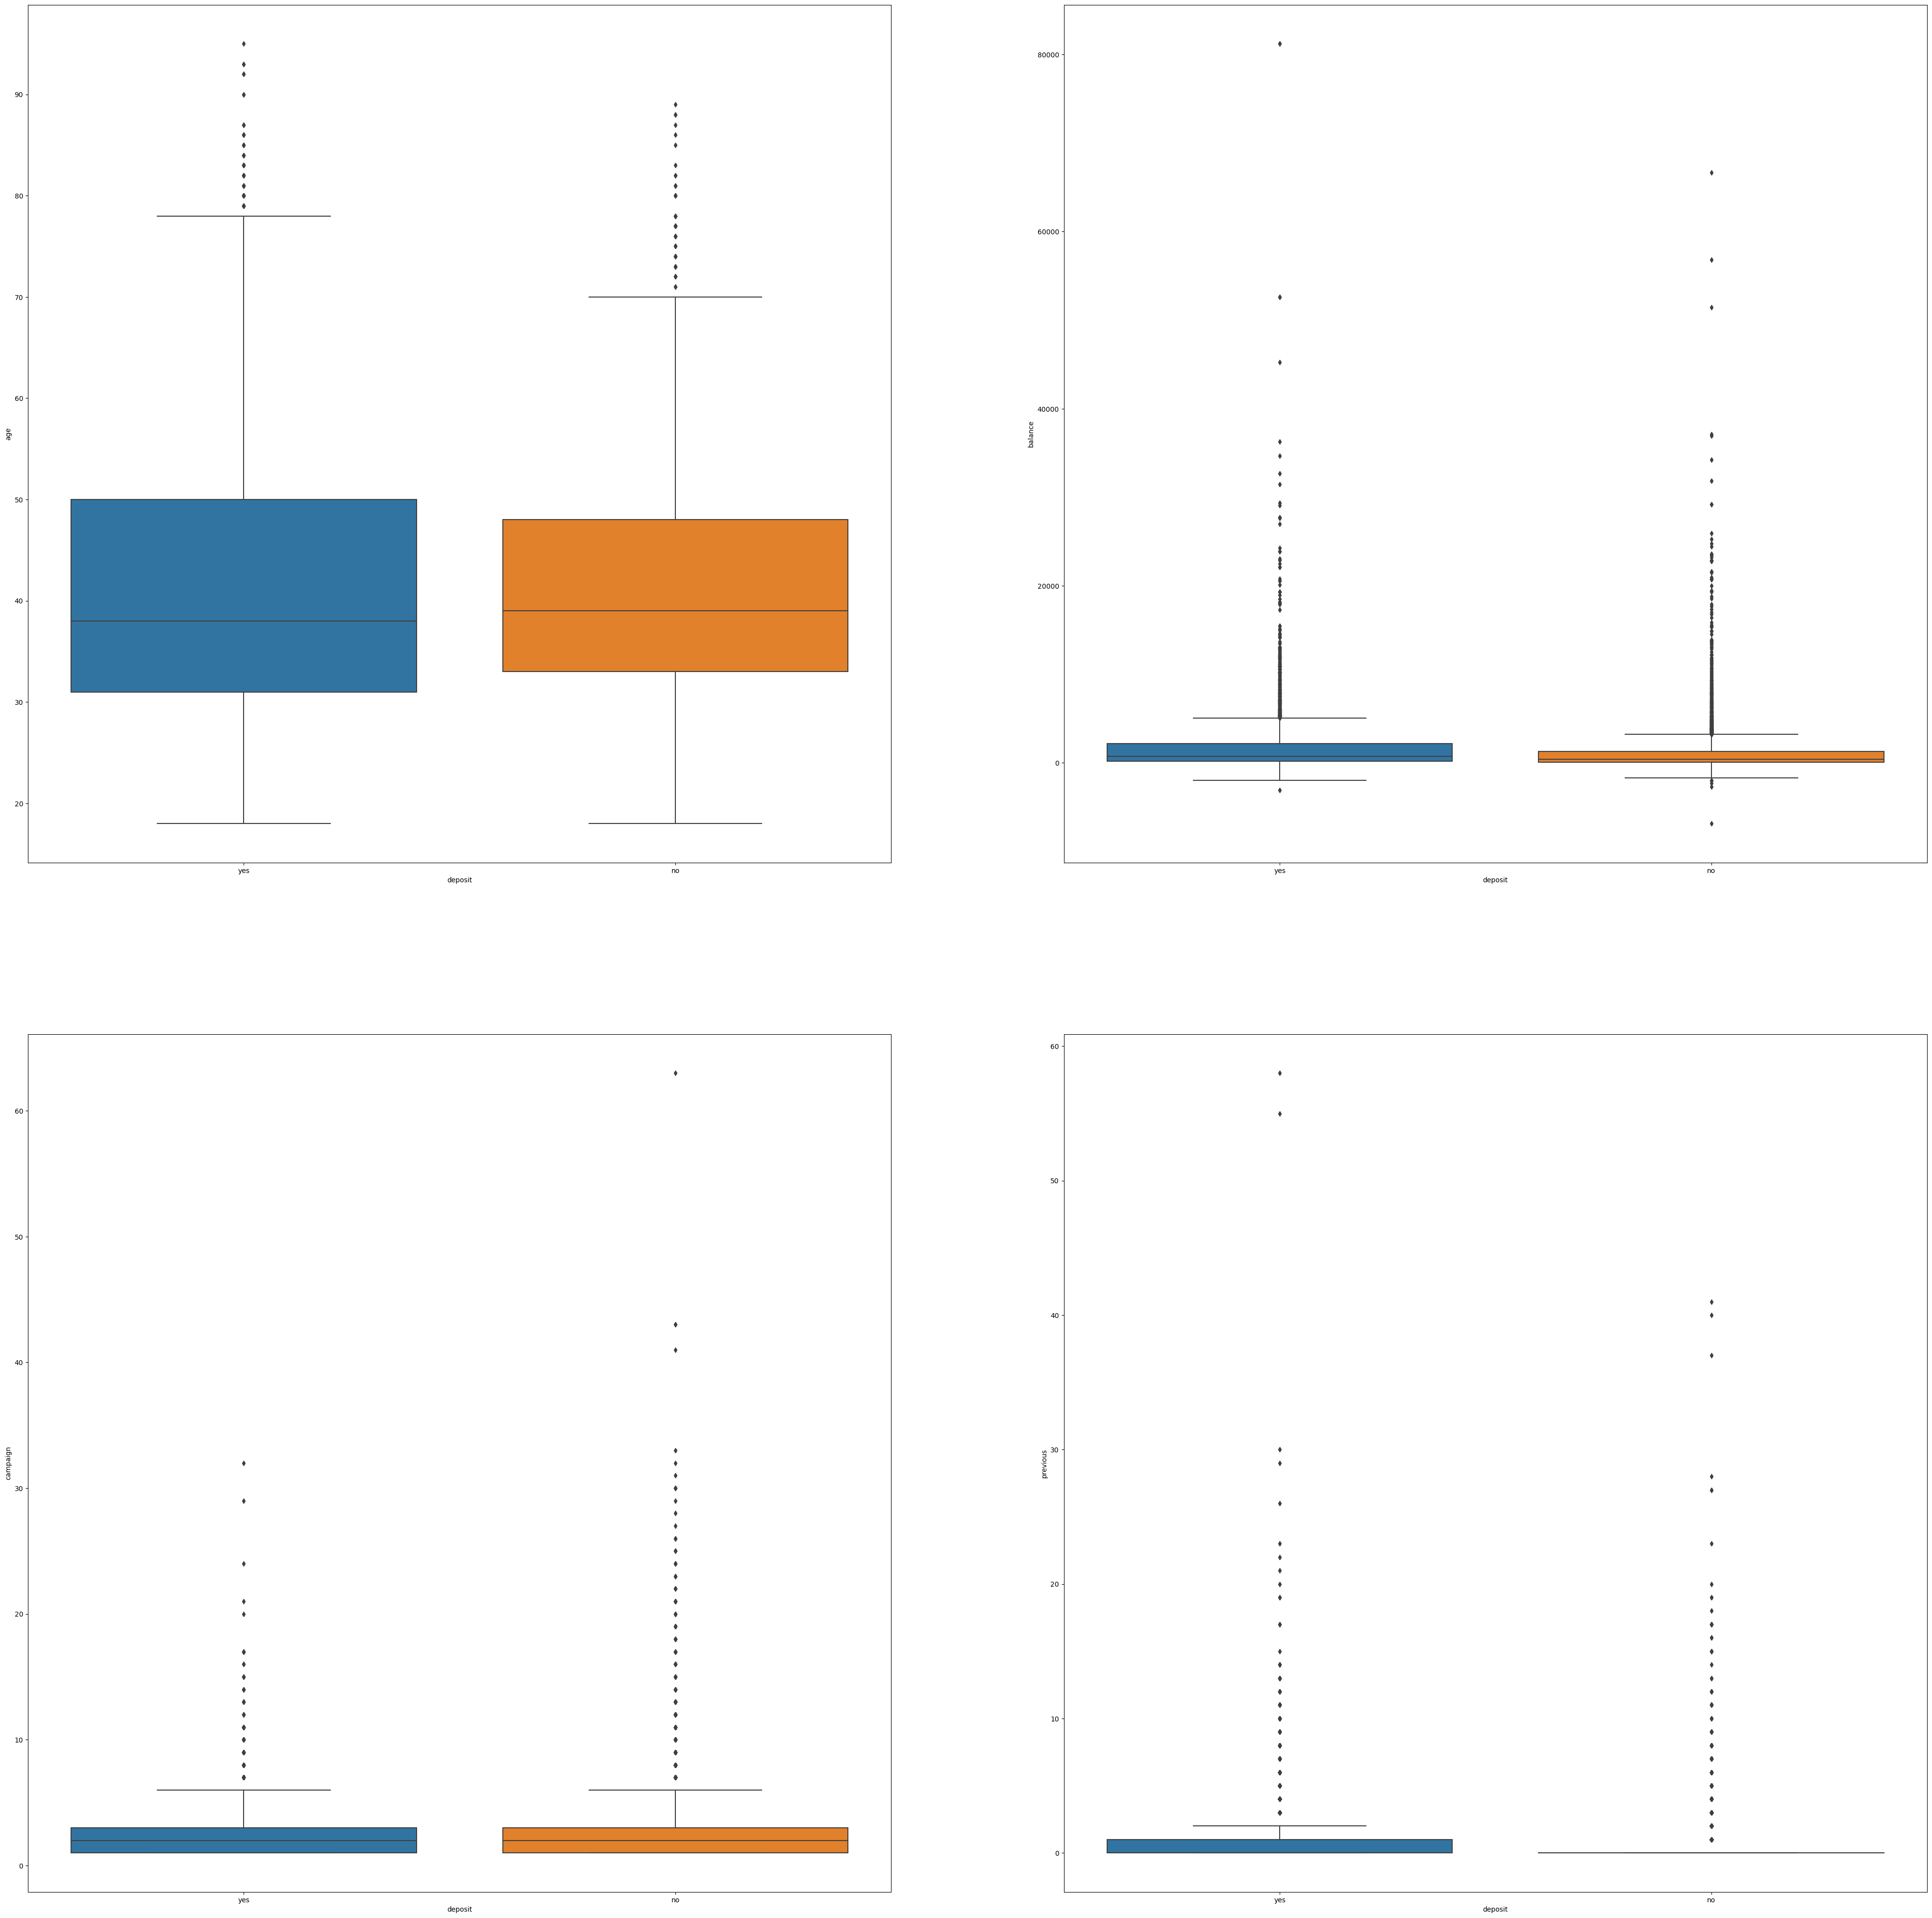

In [19]:
figure, axis = plt.subplots(2, 2, figsize = (50,50))
sns.boxplot(x='deposit',y='age',data=df,ax=axis[0,0])
sns.boxplot(x='deposit',y='balance',data=df,ax=axis[0,1])
sns.boxplot(x='deposit',y='campaign',data=df,ax=axis[1,0])
sns.boxplot(x='deposit',y='previous',data=df,ax=axis[1,1])


## Outliers removal

In [20]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [21]:
LR,UR=Outdet(df_numerical.age)
print(LR,UR)

6.5 74.5


In [22]:
df3=df2[(df2['age'] > LR)  &  (df2['age'] < UR)]
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,5,failure,no


In [23]:
df3.deposit.value_counts()

no     5834
yes    5157
Name: deposit, dtype: int64

In [24]:
LR,UR=Outdet(df_numerical.balance)
df4=df3[(df3['balance'] > LR)  &  (df3['balance'] < UR)]
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,5,failure,no


In [25]:
df4.deposit.value_counts()

no     5388
yes    4583
Name: deposit, dtype: int64

In [26]:
LR,UR=Outdet(df_numerical.campaign)
df5=df4[(df4['campaign'] > LR)  &  (df4['campaign'] < UR)]
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,5,failure,no


In [27]:
df5.deposit.value_counts()

no     4822
yes    4363
Name: deposit, dtype: int64

In [28]:
LR,UR=Outdet(df_numerical.campaign)
df6=df5[(df5['previous'] > LR)  &  (df5['previous'] < UR)]
df6

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,5,failure,no


In [29]:
df6.deposit.value_counts()

no     4716
yes    4130
Name: deposit, dtype: int64

In [30]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8846 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8846 non-null   int64 
 1   job        8846 non-null   object
 2   marital    8846 non-null   object
 3   education  8846 non-null   object
 4   default    8846 non-null   object
 5   balance    8846 non-null   int64 
 6   housing    8846 non-null   object
 7   loan       8846 non-null   object
 8   contact    8846 non-null   object
 9   day        8846 non-null   int64 
 10  month      8846 non-null   object
 11  campaign   8846 non-null   int64 
 12  previous   8846 non-null   int64 
 13  poutcome   8846 non-null   object
 14  deposit    8846 non-null   object
dtypes: int64(5), object(10)
memory usage: 1.1+ MB


### Unknown values imputing


In [31]:
df6.job.value_counts(normalize=True)

management       0.221795
blue-collar      0.184829
technician       0.163803
admin.           0.124237
services         0.086254
retired          0.055957
self-employed    0.035496
unemployed       0.034027
student          0.033009
entrepreneur     0.030296
housemaid        0.024870
unknown          0.005426
Name: job, dtype: float64

In [32]:
df7=df6[df6['job']!="unknown"]

In [33]:
df7.shape

(8798, 15)

In [34]:
df7.deposit.value_counts()

no     4693
yes    4105
Name: deposit, dtype: int64

In [35]:
df7.education.value_counts(normalize=True)

secondary    0.507843
tertiary     0.324392
primary      0.128097
unknown      0.039668
Name: education, dtype: float64

In [36]:
df7['education'] = df7['education'].replace('unknown', 'secondary')

C:\Users\bijoy\AppData\Local\Temp\ipykernel_3336\505194511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['education'] = df7['education'].replace('unknown', 'secondary')


In [37]:
df7.education.value_counts()

secondary    4817
tertiary     2854
primary      1127
Name: education, dtype: int64

In [38]:
df7.contact.value_counts(normalize=True)

cellular     0.724483
unknown      0.221755
telephone    0.053762
Name: contact, dtype: float64

In [39]:
df7['contact'] = df7['contact'].replace('unknown', 'other')

C:\Users\bijoy\AppData\Local\Temp\ipykernel_3336\3652452443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['contact'] = df7['contact'].replace('unknown', 'other')


In [40]:
df7.contact.value_counts(normalize=True)

cellular     0.724483
other        0.221755
telephone    0.053762
Name: contact, dtype: float64

In [41]:
df7.poutcome.value_counts(normalize=True)

unknown    0.766424
failure    0.106842
success    0.086042
other      0.040691
Name: poutcome, dtype: float64

In [42]:
df8=df7[df7['poutcome']!="other"]

In [43]:
df8.deposit.value_counts()

no     4536
yes    3904
Name: deposit, dtype: int64

In [44]:
df8.shape

(8440, 15)

In [45]:
df8['poutcome'] = df8['poutcome'].replace('unknown', 'first campaign')

C:\Users\bijoy\AppData\Local\Temp\ipykernel_3336\507469918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['poutcome'] = df8['poutcome'].replace('unknown', 'first campaign')


In [46]:
df8["poutcome"].value_counts()

first campaign    6743
failure            940
success            757
Name: poutcome, dtype: int64

In [47]:
df8.deposit.value_counts()

no     4536
yes    3904
Name: deposit, dtype: int64

In [48]:
df8.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,other,5,may,1,0,first campaign,yes
1,56,admin.,married,secondary,no,45,no,no,other,5,may,1,0,first campaign,yes
2,41,technician,married,secondary,no,1270,yes,no,other,5,may,1,0,first campaign,yes
3,55,services,married,secondary,no,2476,yes,no,other,5,may,1,0,first campaign,yes
4,54,admin.,married,tertiary,no,184,no,no,other,5,may,2,0,first campaign,yes


## Categorical to numerical transformation

In [49]:
df8['deposit'] = df8['deposit'].map(lambda x: 1 if x == 'yes' else 0)

C:\Users\bijoy\AppData\Local\Temp\ipykernel_3336\2274871458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['deposit'] = df8['deposit'].map(lambda x: 1 if x == 'yes' else 0)


In [50]:
df8['deposit'].value_counts(normalize=True)

0    0.537441
1    0.462559
Name: deposit, dtype: float64

### Job encoding

In [51]:
dummies=pd.get_dummies(df8.job,drop_first=True)

In [52]:
df8 = pd.concat([df8,dummies],axis ='columns')
df8.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,admin.,married,secondary,no,2343,yes,no,other,5,may,1,0,first campaign,1,0,0,0,0,0,0,0,0,0,0
1,56,admin.,married,secondary,no,45,no,no,other,5,may,1,0,first campaign,1,0,0,0,0,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,other,5,may,1,0,first campaign,1,0,0,0,0,0,0,0,0,1,0


### Default, Housing,Loan

In [53]:
df8['default'] = df8['default'].apply(lambda x: 0 if x == 'yes' else 1)

In [54]:
df8['housing'] = df8['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [55]:
df8['loan'] = df8['loan'].apply(lambda x: 1 if x == 'yes' else 0)

### Month

In [56]:
df8['month'] = df8['month'].replace(['jan', 'feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

### Education

In [57]:
#creating a dictionary with weights assigned to each education label category
label_mapping_education={'secondary':3, 'tertiary':5, 'primary':1}
df8["education_map"]=df8["education"].map(label_mapping_education)

### Marital status

In [58]:
df8.marital.value_counts()

married     4715
single      2725
divorced    1000
Name: marital, dtype: int64

In [59]:
dummies=pd.get_dummies(df8.marital,drop_first=True)
df8 = pd.concat([df8,dummies],axis ='columns')
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 11161
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            8440 non-null   int64 
 1   job            8440 non-null   object
 2   marital        8440 non-null   object
 3   education      8440 non-null   object
 4   default        8440 non-null   int64 
 5   balance        8440 non-null   int64 
 6   housing        8440 non-null   int64 
 7   loan           8440 non-null   int64 
 8   contact        8440 non-null   object
 9   day            8440 non-null   int64 
 10  month          8440 non-null   int64 
 11  campaign       8440 non-null   int64 
 12  previous       8440 non-null   int64 
 13  poutcome       8440 non-null   object
 14  deposit        8440 non-null   int64 
 15  blue-collar    8440 non-null   uint8 
 16  entrepreneur   8440 non-null   uint8 
 17  housemaid      8440 non-null   uint8 
 18  management     8440 non-nul

### Contact and poutcome

In [60]:
df8.contact.value_counts()

cellular     6042
other        1947
telephone     451
Name: contact, dtype: int64

In [61]:
dummies_1=pd.get_dummies(df8[['contact','poutcome']],drop_first=True)
df8 = pd.concat([df8,dummies_1],axis ='columns')
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 11161
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      8440 non-null   int64 
 1   job                      8440 non-null   object
 2   marital                  8440 non-null   object
 3   education                8440 non-null   object
 4   default                  8440 non-null   int64 
 5   balance                  8440 non-null   int64 
 6   housing                  8440 non-null   int64 
 7   loan                     8440 non-null   int64 
 8   contact                  8440 non-null   object
 9   day                      8440 non-null   int64 
 10  month                    8440 non-null   int64 
 11  campaign                 8440 non-null   int64 
 12  previous                 8440 non-null   int64 
 13  poutcome                 8440 non-null   object
 14  deposit                  8440 non-null 

In [62]:
df8=df8.drop(['marital','job','contact','poutcome','education'],axis=1)

In [63]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      8440 non-null   int64
 1   default                  8440 non-null   int64
 2   balance                  8440 non-null   int64
 3   housing                  8440 non-null   int64
 4   loan                     8440 non-null   int64
 5   day                      8440 non-null   int64
 6   month                    8440 non-null   int64
 7   campaign                 8440 non-null   int64
 8   previous                 8440 non-null   int64
 9   deposit                  8440 non-null   int64
 10  blue-collar              8440 non-null   uint8
 11  entrepreneur             8440 non-null   uint8
 12  housemaid                8440 non-null   uint8
 13  management               8440 non-null   uint8
 14  retired                  8440 non-null   uint8
 15  sel

## X,y

In [64]:
y=df8[['deposit']]

In [65]:
y.head()

,deposit
0,1
1,1
2,1
3,1
4,1


In [66]:
y.shape

(8440, 1)

In [67]:
X=df8.drop(['deposit'],axis=1)

In [68]:
X.head()

,age,default,balance,housing,loan,day,month,campaign,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,education_map,married,single,contact_other,contact_telephone,poutcome_first campaign,poutcome_success
0,59,1,2343,1,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,0,1,0
1,56,1,45,0,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,0,1,0
2,41,1,1270,1,0,5,5,1,0,0,0,0,0,0,0,0,0,1,0,3,1,0,1,0,1,0
3,55,1,2476,1,0,5,5,1,0,0,0,0,0,0,0,1,0,0,0,3,1,0,1,0,1,0
4,54,1,184,0,0,5,5,2,0,0,0,0,0,0,0,0,0,0,0,5,1,0,1,0,1,0


In [69]:
X.shape

(8440, 26)

## Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [71]:
print(X)

[[ 1.70402746  0.12797519  1.56048753 ... -0.23759761  0.50166562
  -0.31389364]
 [ 1.43035236  0.12797519 -0.75981714 ... -0.23759761  0.50166562
  -0.31389364]
 [ 0.06197682  0.12797519  0.47707286 ... -0.23759761  0.50166562
  -0.31389364]
 ...
 [-0.7590485   0.12797519 -0.77597244 ... -0.23759761  0.50166562
  -0.31389364]
 [ 0.24442689  0.12797519 -0.80525391 ... -0.23759761 -1.99335963
  -0.31389364]
 [-0.57659843  0.12797519 -0.80525391 ... -0.23759761  0.50166562
  -0.31389364]]


## Test train split

In [72]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=20)

# Model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Logistic Regression (LR) Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion= "entropy",max_depth=10, min_samples_leaf= 4, min_samples_split= 2)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)



# Print results
print("LR Accuracy:", lr_accuracy)
print("LR Confusion Matrix:")
print(lr_confusion_matrix)

print("\nDT Accuracy:", dt_accuracy)
print("DT Confusion Matrix:")
print(dt_confusion_matrix)

print("\nRF Accuracy:", rf_accuracy)
print("RF Confusion Matrix:")
print(rf_confusion_matrix)

LR Accuracy: 0.6949052132701422
LR Confusion Matrix:
[[685 216]
 [299 488]]

DT Accuracy: 0.7037914691943128
DT Confusion Matrix:
[[802  99]
 [401 386]]

RF Accuracy: 0.7132701421800948
RF Confusion Matrix:
[[704 197]
 [287 500]]


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.6925355450236966


In [75]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy: 0.7031990521327014


[Text(0.7799986471861472, 0.9545454545454546, 'X[25] <= 1.436\nentropy = 0.996\nsamples = 6752\nvalue = [3635, 3117]'),
 Text(0.650094696969697, 0.8636363636363636, 'X[22] <= 0.639\nentropy = 0.981\nsamples = 6165\nvalue = [3583, 2582]'),
 Text(0.4803841991341991, 0.7727272727272727, 'X[3] <= 0.021\nentropy = 0.999\nsamples = 4595\nvalue = [2366, 2229]'),
 Text(0.25757575757575757, 0.6818181818181818, 'X[6] <= 0.152\nentropy = 0.991\nsamples = 2582\nvalue = [1147, 1435]'),
 Text(0.12283549783549784, 0.5909090909090909, 'X[6] <= -1.429\nentropy = 0.911\nsamples = 1008\nvalue = [329, 679]'),
 Text(0.06493506493506493, 0.5, 'X[5] <= 1.451\nentropy = 1.0\nsamples = 396\nvalue = [200, 196]'),
 Text(0.03463203463203463, 0.4090909090909091, 'X[5] <= -0.695\nentropy = 0.975\nsamples = 283\nvalue = [115, 168]'),
 Text(0.021645021645021644, 0.3181818181818182, 'X[0] <= 2.479\nentropy = 0.988\nsamples = 188\nvalue = [106, 82]'),
 Text(0.017316017316017316, 0.22727272727272727, 'X[0] <= 0.701\nent

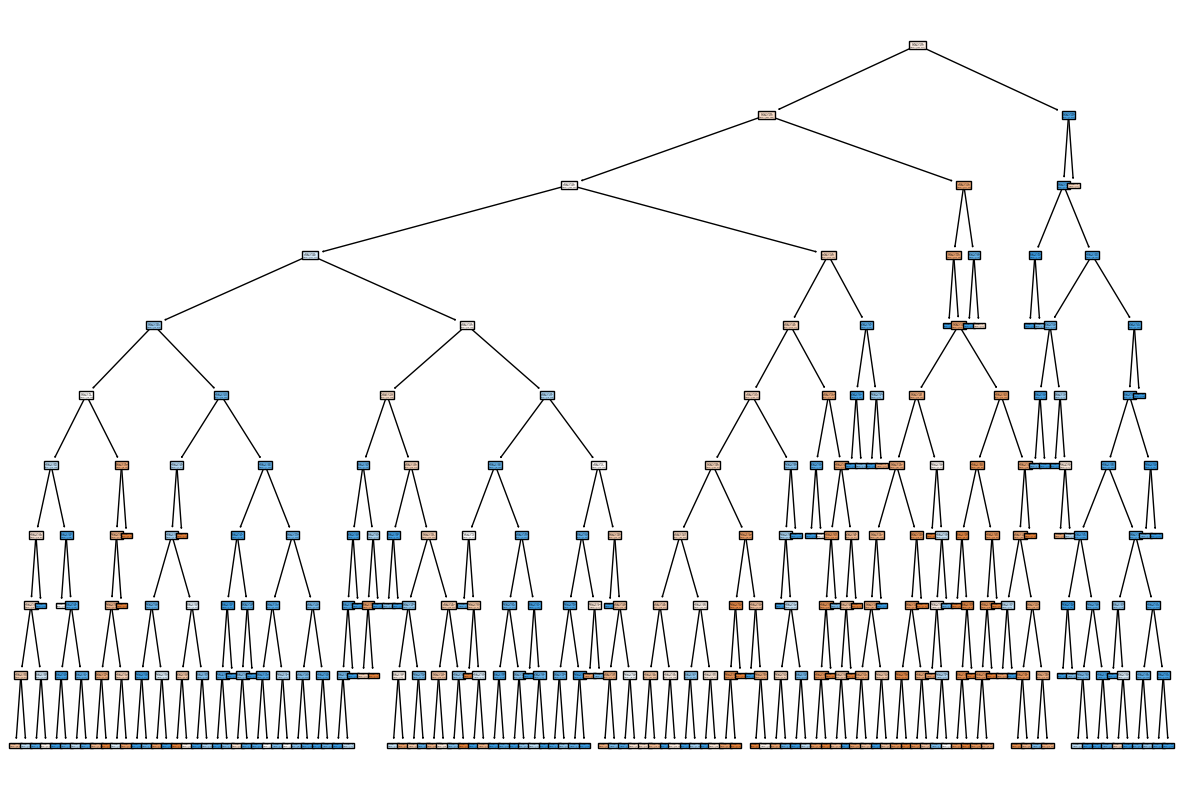

In [85]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier,filled=True)

In [87]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest model
random_forest = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50,100,150,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.7162322274881516
